___
# ML: Random Forest, Final Project - gsaez 

For this project the data I'll be using will be exploring publicly available data from [LendingClub.com] and available in Kaggle.com as well. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

The project will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from https://www.kaggle.com/braindeadcoder/lending-club-data.

Data Columns description:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# 1.Importing Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

## 2. Reading the Data

**Using pandas to read loan_data.csv as a dataframe called loans.**

In [113]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [33]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [45]:
irate = loans['int.rate']
LN_irate = np.log(irate)
#LN_LotArea.head()
LNirate = pd.DataFrame(LN_irate)
LNirate.rename(columns={'int.rate':"log_int.rate"}, inplace= True)
LNirate.head(3)

,log_int.rate
0,-2.129472
1,-2.233992
2,-1.997309


In [46]:
install = loans['installment']
LN_install = np.log(install)
#LN_LotArea.head()
LNinstall = pd.DataFrame(LN_install)
LNinstall.rename(columns={'installment':"log_intallment"}, inplace= True)
LNinstall.head(3)

,log_intallment
0,6.720341
1,5.430310
2,5.904980


In [47]:
fico = loans['fico']
LN_fico = np.log(fico)
#LN_LotArea.head()
LNfico = pd.DataFrame(LN_fico)
LNfico.rename(columns={'fico':"log_fico"}, inplace= True)
LNfico.head(3)

,log_fico
0,6.602588
1,6.561031
2,6.525030


In [48]:
dcl = loans['days.with.cr.line']
LN_dcl = np.log(dcl)
#LN_LotArea.head()
LNdcl = pd.DataFrame(LN_dcl)
LNdcl.rename(columns={'days.with.cr.line':"log_dayscreditline"}, inplace= True)
LNdcl.head(3)

,log_dayscreditline
0,8.637632
1,7.922986
2,8.457443


In [87]:
loans =  pd.concat([loans, LNdcl, LNfico, LNinstall, LNirate],axis =1)
loans.head()

,credit.policy,purpose,log.annual.inc,dti,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,log_dayscreditline,log_fico,log_intallment,log_int.rate,log_dayscreditline,log_fico,log_intallment,log_int.rate
0,1,debt_consolidation,11.350407,19.48,28854,52.1,0,0,0,0,8.637632,6.602588,6.720341,-2.129472,8.637632,6.602588,6.720341,-2.129472
1,1,credit_card,11.082143,14.29,33623,76.7,0,0,0,0,7.922986,6.561031,5.430310,-2.233992,7.922986,6.561031,5.430310,-2.233992
2,1,debt_consolidation,10.373491,11.63,3511,25.6,1,0,0,0,8.457443,6.525030,5.904980,-1.997309,8.457443,6.525030,5.904980,-1.997309
3,1,debt_consolidation,11.350407,8.10,33667,73.2,1,0,0,0,7.900992,6.568078,5.089693,-2.294617,7.900992,6.568078,5.089693,-2.294617
4,1,credit_card,11.299732,14.97,4740,39.5,0,1,0,0,8.310415,6.502790,4.633952,-1.947712,8.310415,6.502790,4.633952,-1.947712


In [50]:
loans.drop(['int.rate', 'installment' , 'fico', 'days.with.cr.line'  ],axis =1,inplace = True)

In [55]:
loans.head()

,credit.policy,purpose,log.annual.inc,dti,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,log_dayscreditline,log_fico,log_intallment,log_int.rate
0,1,debt_consolidation,11.350407,19.48,28854,52.1,0,0,0,0,8.637632,6.602588,6.720341,-2.129472
1,1,credit_card,11.082143,14.29,33623,76.7,0,0,0,0,7.922986,6.561031,5.430310,-2.233992
2,1,debt_consolidation,10.373491,11.63,3511,25.6,1,0,0,0,8.457443,6.525030,5.904980,-1.997309
3,1,debt_consolidation,11.350407,8.10,33667,73.2,1,0,0,0,7.900992,6.568078,5.089693,-2.294617
4,1,credit_card,11.299732,14.97,4740,39.5,0,1,0,0,8.310415,6.502790,4.633952,-1.947712


# 3. Exploratory Data Analysis

**In this process, I will use seaborn, matplolib, numpy, and pandas to understand insights from the dataset.**

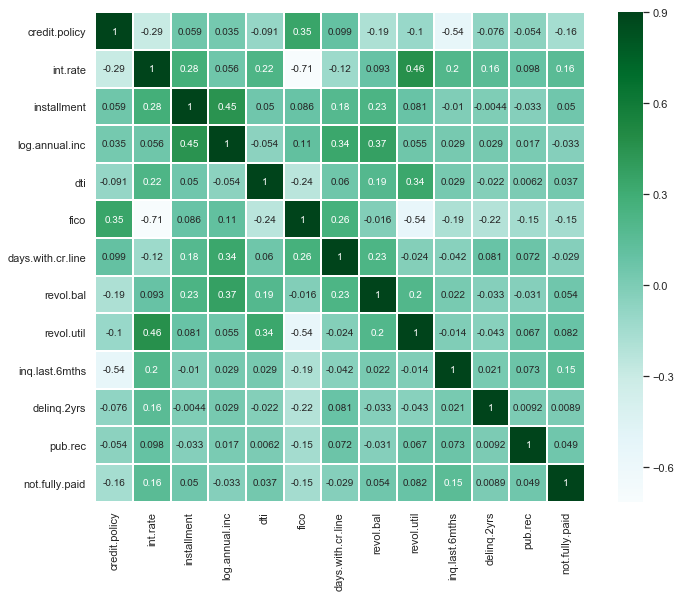

In [48]:
corrmat = loans.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='BuGn', linecolor='white',linewidths=1,vmax=0.9, square=True, annot=True)

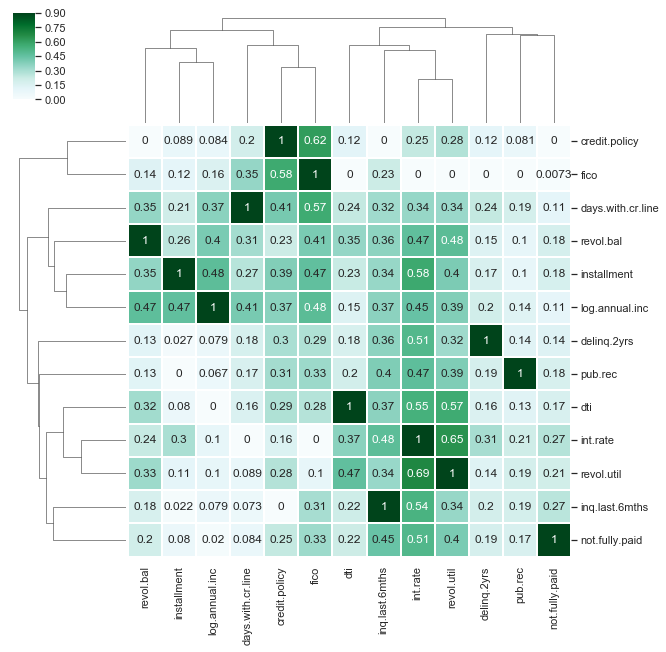

In [41]:
sns.clustermap(corrmat,cmap='BuGn',standard_scale=1 ,linewidths=1,vmax=0.9, linecolor='white', annot=True).savefig('cluster.png')


 mu = 10.93 and sigma = 0.61



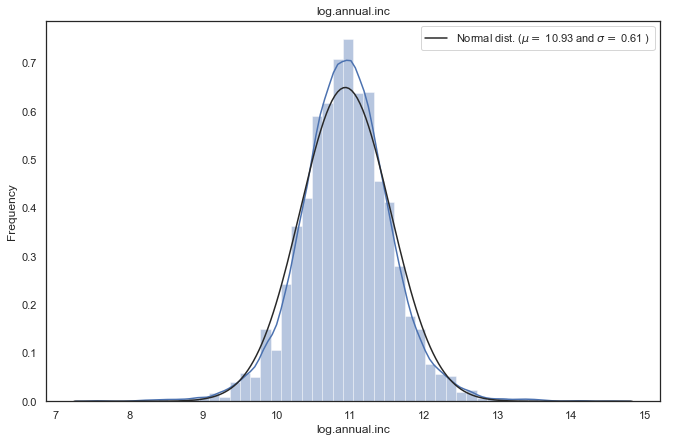

<Figure size 432x288 with 0 Axes>

In [188]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.distplot(loans['log.annual.inc'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(loans['log.annual.inc'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log.annual.inc')

#Get also the QQ-plot
fig = plt.figure()
#res = stats.probplot(ad_data['Age'], plot=plt)
plt.show()


 mu = 4560.77 and sigma = 2496.80



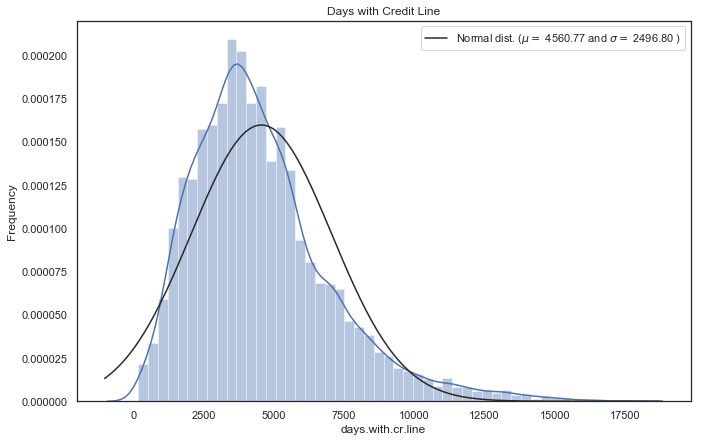

<Figure size 432x288 with 0 Axes>

In [187]:
import seaborn as sns
plt.figure(figsize=(11,7))
sns.distplot(loans['days.with.cr.line'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(loans['days.with.cr.line'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Days with Credit Line')

#Get also the QQ-plot
fig = plt.figure()
#res = stats.probplot(ad_data['Age'], plot=plt)
plt.show()


 mu = 710.85 and sigma = 37.97



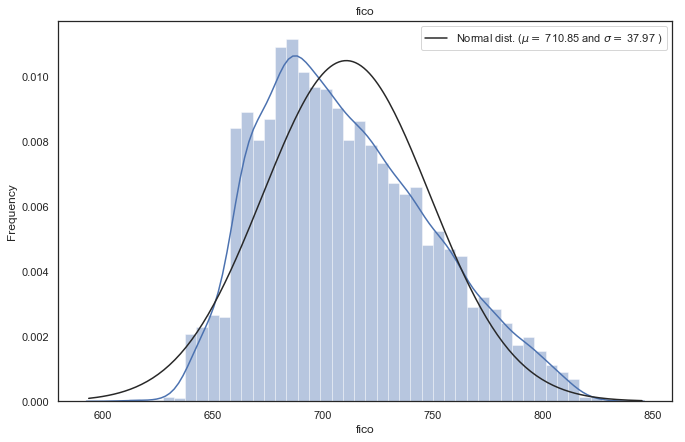

<Figure size 432x288 with 0 Axes>

In [186]:
import seaborn as sns, numpy as np
plt.figure(figsize=(11,7))
sns.distplot(loans['fico'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(loans['fico'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('fico')

#Get also the QQ-plot
fig = plt.figure()
#res = stats.probplot(ad_data['Age'], plot=plt)
plt.show()


 mu = 0.12 and sigma = 0.03



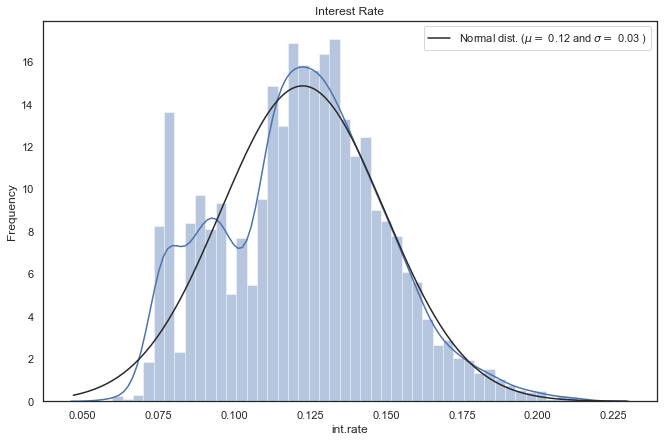

<Figure size 432x288 with 0 Axes>

In [185]:
import seaborn as sns, numpy as np
plt.figure(figsize=(11,7))
sns.distplot(loans['int.rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(loans['int.rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Interest Rate')

#Get also the QQ-plot
fig = plt.figure()
#res = stats.probplot(ad_data['Age'], plot=plt)
# save the figure
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')


plt.show()

Text(0.5, 0, 'Inquiry last 6-months')

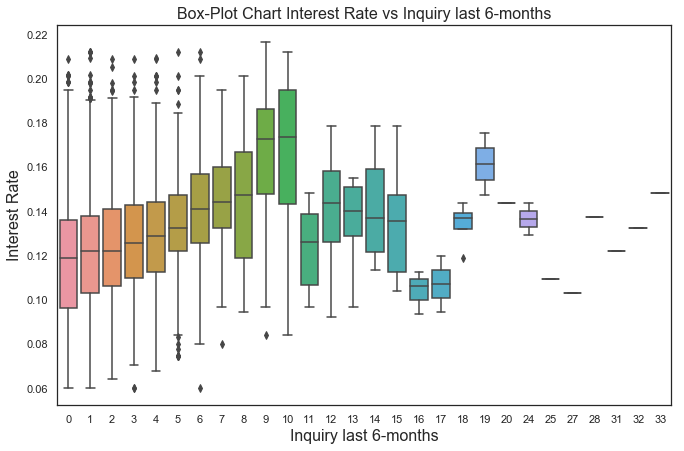

In [184]:
plt.figure(figsize=(11,7))
sns.boxplot(x='inq.last.6mths', y='int.rate', data=loans)
plt.title("Box-Plot Chart Interest Rate vs Inquiry last 6-months", fontsize=16)
plt.ylabel("Interest Rate", fontsize=16)
plt.xlabel("Inquiry last 6-months", fontsize=16)

Text(0.5, 0, 'Inquiry last 6-months')

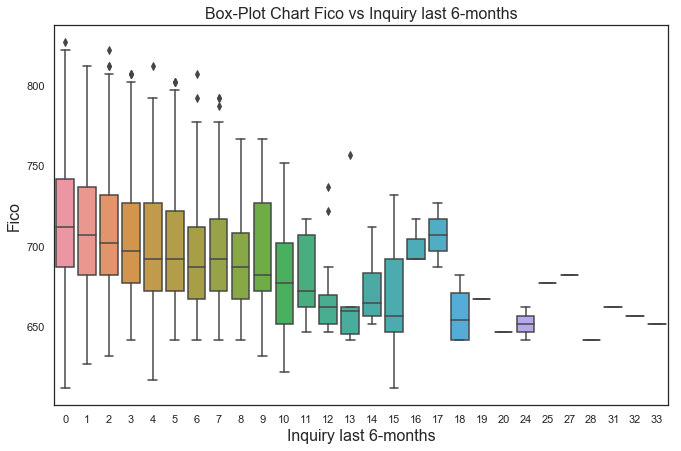

In [183]:
plt.figure(figsize=(11,7))
sns.boxplot(x='inq.last.6mths', y='fico', data=loans)
plt.title("Box-Plot Chart Fico vs Inquiry last 6-months", fontsize=16)
plt.ylabel("Fico", fontsize=16)
plt.xlabel("Inquiry last 6-months", fontsize=16)

Text(0.5, 0, 'FICO')

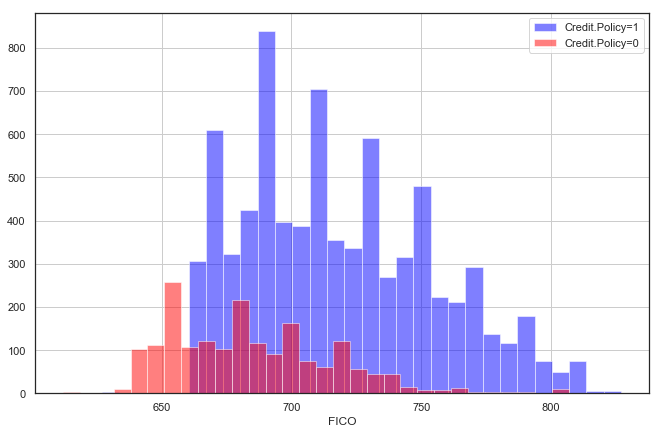

In [182]:
plt.figure(figsize=(11,7))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

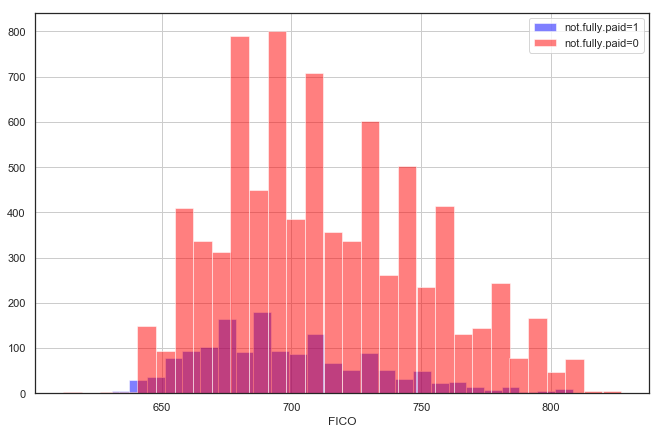

In [181]:
plt.figure(figsize=(11,7))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

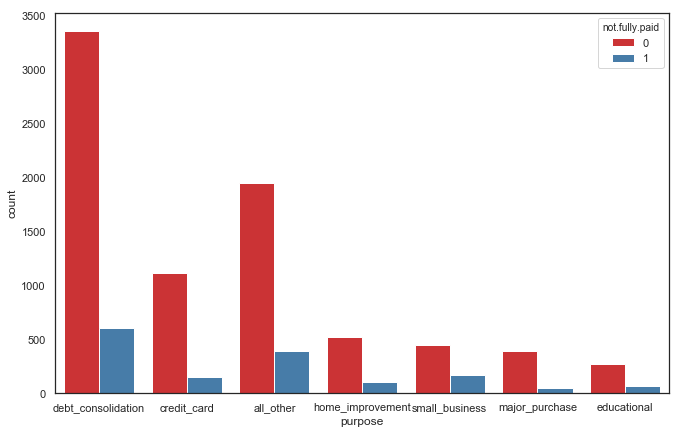

In [180]:
plt.figure(figsize=(11,7))

sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

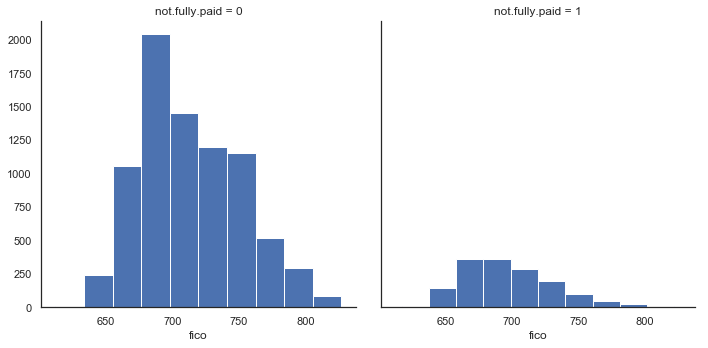

In [179]:
import seaborn as sns
g = sns.FacetGrid(data=loans,col='not.fully.paid', height=5)
g.map(plt.hist,'fico')

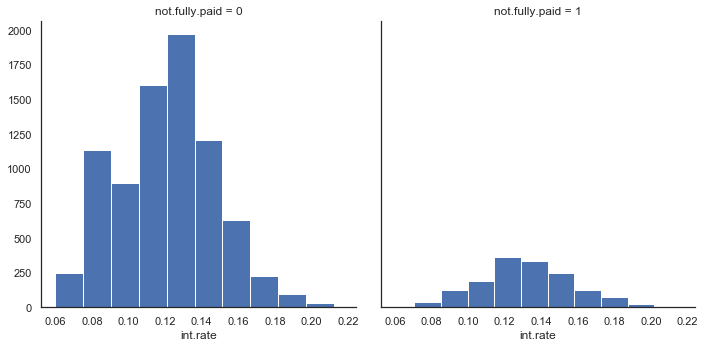

In [178]:
g = sns.FacetGrid(data=loans,col='not.fully.paid', height=5)
g.map(plt.hist,'int.rate')

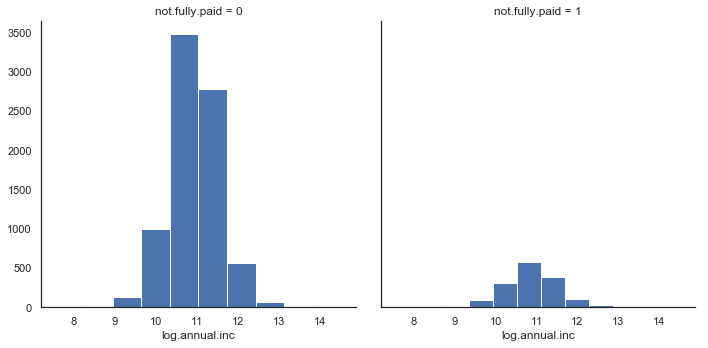

In [177]:
g = sns.FacetGrid(data=loans,col='not.fully.paid', height=5)
g.map(plt.hist,'log.annual.inc')

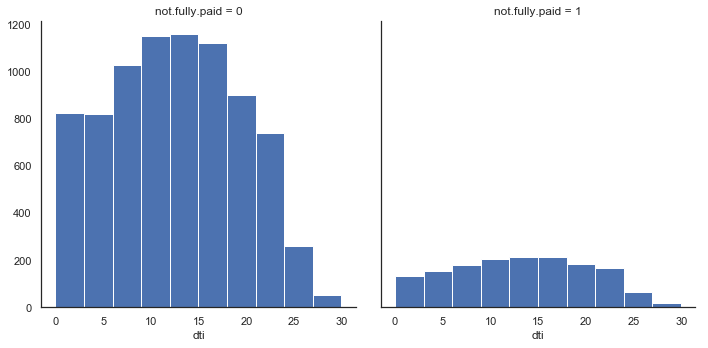

In [176]:
g = sns.FacetGrid(data=loans,col='not.fully.paid', height=5)
g.map(plt.hist,'dti')

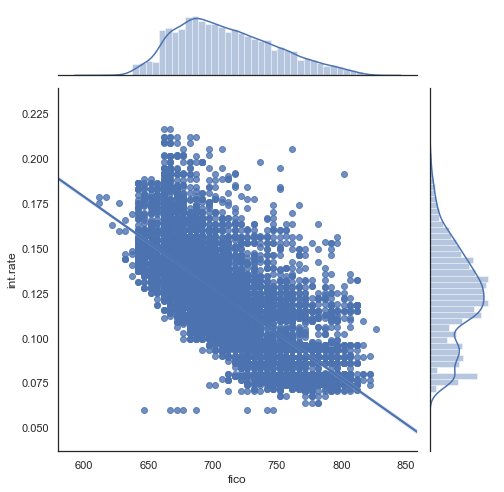

In [175]:
g = sns.JointGrid(x="fico", y="int.rate", data=loans,height=7)
g = g.plot(sns.regplot, sns.distplot)

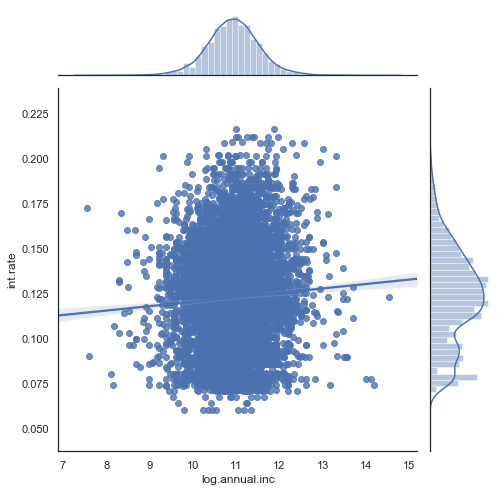

In [174]:
g = sns.JointGrid(x="log.annual.inc", y="int.rate", data=loans,height=7)
g = g.plot(sns.regplot, sns.distplot)

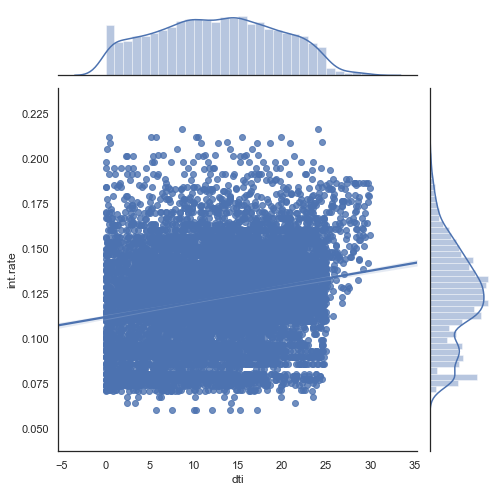

In [173]:
g = sns.JointGrid(x="dti", y="int.rate", data=loans,height=7)
g = g.plot(sns.regplot, sns.distplot)

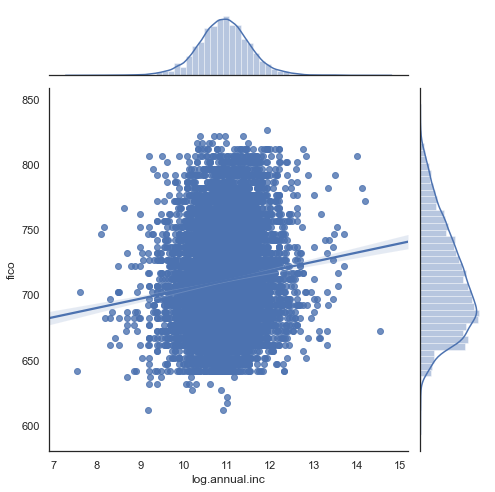

In [172]:
g = sns.JointGrid(x="log.annual.inc", y="fico", data=loans,height=7)
g = g.plot(sns.regplot, sns.distplot)

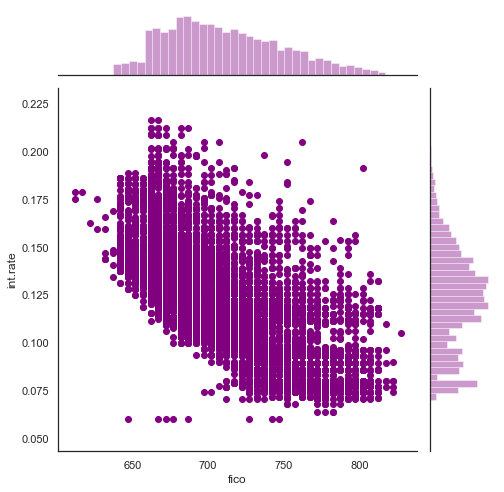

In [169]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple',height=7)

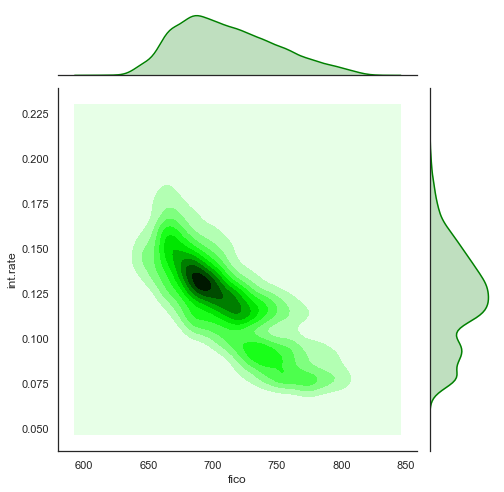

In [167]:
sns.set(style="white")
sns.jointplot(x='fico',y='int.rate',data=loans,color='green',kind='kde',height=7);

<Figure size 864x432 with 0 Axes>

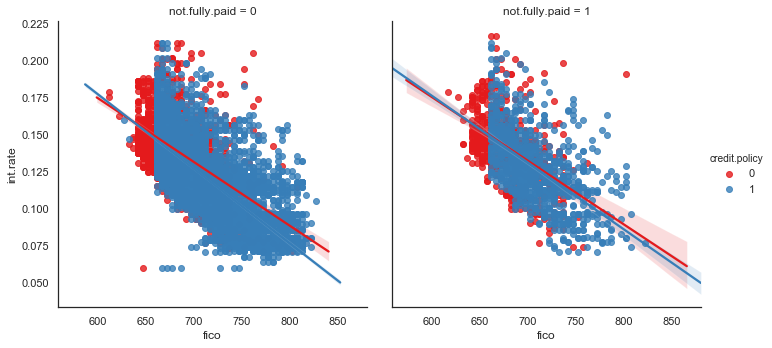

In [170]:
plt.figure(figsize=(12,6))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# 4. Setting up the Data

In order to get ready to set up the data for our Decission Tree and Random Forest Classification Model

In [53]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy         9578 non-null int64
purpose               9578 non-null object
log.annual.inc        9578 non-null float64
dti                   9578 non-null float64
revol.bal             9578 non-null int64
revol.util            9578 non-null float64
inq.last.6mths        9578 non-null int64
delinq.2yrs           9578 non-null int64
pub.rec               9578 non-null int64
not.fully.paid        9578 non-null int64
log_dayscreditline    9578 non-null float64
log_fico              9578 non-null float64
log_intallment        9578 non-null float64
log_int.rate          9578 non-null float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


In [7]:
import statsmodels.api as sm
 

X = loans[['credit.policy', 'int.rate', 'installment', 
'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 
'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].values
y = loans['not.fully.paid'].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     44.43
Date:                Sat, 18 Jan 2020   Prob (F-statistic):          1.92e-103
Time:                        10:13:32   Log-Likelihood:                -3720.9
No. Observations:                9578   AIC:                             7468.
Df Residuals:                    9565   BIC:                             7561.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0911      0.161      6.786      0.0

In [56]:
import statsmodels.api as sm
 

X = loans[['credit.policy', 'log_int.rate', 'log_intallment', 
'log.annual.inc', 'dti', 'log_fico', 'log_dayscreditline', 
'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].values
y = loans['not.fully.paid'].values
 

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     43.69
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          1.16e-101
Time:                        10:42:21   Log-Likelihood:                -3725.1
No. Observations:                9578   AIC:                             7476.
Df Residuals:                    9565   BIC:                             7569.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6496      0.792      4.607      0.0

## 5. Creating Categorical Features

The **purpose** column as categorical means we need to transform them using dummy variables so sklearn will be able to understand them. We can do this in one clean step using pd.get_dummies.

In [57]:
cat_feats = ['purpose']

Now I use **pd.get_dummies(loans,columns=cat_feats,drop_first=True)** to create a fixed larger dataframe that has new feature columns with dummy variables.Finally, I Set this dataframe as **final_data.**

In [58]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
log_dayscreditline            9578 non-null float64
log_fico                      9578 non-null float64
log_intallment                9578 non-null float64
log_int.rate                  9578 non-null float64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase       

## 6. Train Test Split

Now its time to split the data into a training set and a testing set by using **sklearn** to split the dataset into a training set and a testing set.

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## 7. Training a Decision Tree Model

Firstly, I started by training a single decision tree first **Import DecisionTreeClassifier**. Secondly, I Created an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtree = DecisionTreeClassifier()

In [118]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 8. Predictions and Evaluation of Decision Tree
To Evaluate the model it is reasonable to **Create predictions from the test set and create a classification report and a confusion matrix.**

In [142]:
predictions = dtree.predict(X_test)

In [143]:
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.23      0.21       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [145]:
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

[[2009  422]
 [ 343  100]]


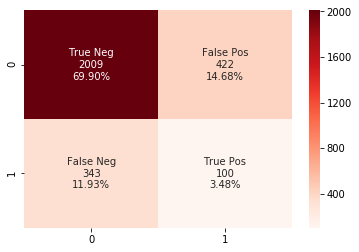

In [146]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

## 9. Training the Random Forest model

Now I can **Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rfc = RandomForestClassifier(n_estimators=700)

In [149]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 10. Predictions and Evaluation

Finally, we can predict off the y_test values and evaluate this model: **Predict the class of not.fully.paid for the X_test data.**

In [150]:
predictions = rfc.predict(X_test)

In [151]:
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.58      0.02      0.03       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.81      0.85      0.78      2874



**Showing the Confusion Matrix for the predictions.**

In [153]:
cf_matrix2 = confusion_matrix(y_test,predictions)
print(cf_matrix2)
#print(confusion_matrix(y_test,predictions))

[[2426    5]
 [ 436    7]]


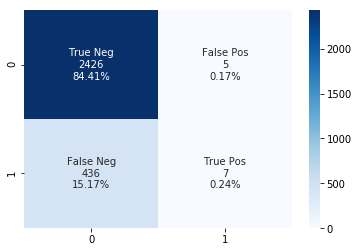

In [155]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues')

**Which model performes better the random forest or the decision tree?**
Both models performed poorly, however will depend on what feature we want to optimze for. The **Main Conclusion** is that we need more features to improve this model. 

In [157]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.5068722938195784

In [158]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [159]:
metrics.mean_absolute_error(y_test,predictions)

0.1534446764091858

In [160]:
metrics.mean_squared_error(y_test,predictions)

0.1534446764091858

In [161]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.39172015062948423

In [166]:
model.score(X_test, y_test)

0.8458594293667363

In [162]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [163]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


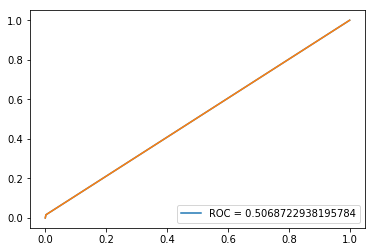

In [164]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, predictions)
fpr1, tpr1, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr1,tpr1,label="ROC = "+str(auc1))
plt.plot(fpr1,tpr1)
plt.legend(loc=4)
plt.show()

## 11. Gridsearch
Finding the right parameters (like what C or gamma values to use), However, we can be a just try a bunch of combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch; GridSearchCV, which CV stands for cross-validation that takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [90]:
from sklearn.svm import SVC

In [91]:
model = SVC()

In [92]:
model.fit(X_train,y_train)

C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
predictions = model.predict(X_test)

In [94]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [97]:
# May take awhile!
grid.fit(X_train,y_train)

C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8372093023255814, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8375111906893464, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8375111906893464, total=   5.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8372093023255814, total=   5.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   5.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   4.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8372093023255814, total=   6.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8375111906893464, total=   5.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8375111906893464, total=   6.0s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8017009847806625, total=   5.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7784243509400179, total=   4.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8376565295169947, total=   6.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8379588182632051, total=   6.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8375111906893464, total=   6.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8363148479427549, total=   6.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   6.0s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 11.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [98]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [99]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
grid_predictions = grid.predict(X_test)

In [104]:
cf_matrix = confusion_matrix(y_test,grid_predictions)
print(cf_matrix)

[[2431    0]
 [ 443    0]]


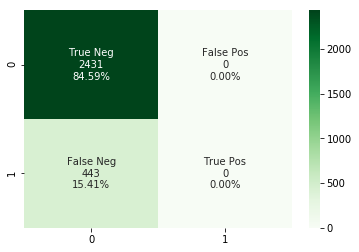

In [108]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [105]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
metrics.mean_absolute_error(y_test,grid_predictions)

0.15414057063326375

In [110]:
metrics.mean_squared_error(y_test,grid_predictions)

0.15414057063326375

In [111]:
np.sqrt(metrics.mean_squared_error(y_test,grid_predictions))

0.39260740012544815

In [112]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, grid_predictions)

0.5